<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [21]:
import pandas as pd

# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [4]:
# Command(s)
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64

<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [15]:
# Command:
auto[auto.isnull().any(axis=1)]

# Comment (One - two sentence)
# I don't see anything particularly interesting. The displacement is a little small (relatively), but everything else

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2


<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [25]:
# Command(s):
auto['horsepower'].median()
auto['horsepower'].fillna(auto['horsepower'].median(), inplace=True)

# Comment (one sentence):
# In the previous question, I didn't see any particular connections among the missing values and other features for any correlation, so I believe this is good.


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

<h3>Q.4. Develop a Linear Regression model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [29]:
# Develop the model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

linear_regression = linear_model.LinearRegression()
# Could've just dropped a column to get X, also convention is to call it big X
y = auto['mpg']
x = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

linear_regression.fit(x_train, y_train)

y_pred = linear_regression.predict(x_test)
print(y_pred)

results = sm.OLS(y, x).fit()
print(results.summary())

# Comment on its quality 
# I think it should be a pretty good model because all of the features have a P value of <0.05 except 1 (acceleration). Removing that may aim for a better model. The R^2 is also very high.

[19.28400115 27.13117191 33.0822608  10.82639746 12.11042947 25.94655225
 20.43788094 32.98146743 27.4301595  22.98689582 26.4526307  30.08381668
 26.90339487 20.69840194 23.79068246 33.61198193 34.04411282 32.02109613
 27.42013136 27.90100222 26.77113794 25.92482425 24.24065389 17.1849767
 33.72934629 25.21003452 20.70265959 23.19428598 26.76462047 32.59201557
 17.03293708 26.99775449 22.10171308 24.64777605 20.04224751 30.8399811
 30.17938647 21.45546542 21.63688832 24.03083011 11.77857548 20.60233403
 28.92258389 15.66560414 15.10817078 35.90975859 31.41560371 31.17954904
  8.91002985 25.3072169  28.76817037 24.04166632 10.22773725 35.47134237
 31.0385717  21.67404787 29.45836168  8.11636351 22.38494117 27.63043733
 15.63619433 20.65678587 25.55020913 17.11652272 24.41189056 15.49492067
 27.11969639 13.72677142 16.75069941 24.36194676 21.68736502 23.5245576
 35.99470185 13.56268155 21.15139495 25.99467509 26.19120743 29.95738043
 34.19679178 30.37558825]
                            

<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution.</h3>

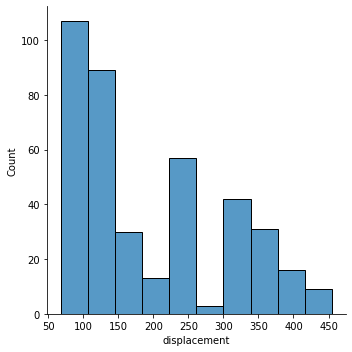

In [30]:
# Histogram of engine displacement
import seaborn as sns
sns.displot(auto, x='displacement')

<h3>Q.6. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

In [ ]:

# Plot histogram of this new feature to reveal normal-like distribution

<h3>Q.7. Recalculate the Linear Regression model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [7]:
# Calculate then new model

# Comment on its performance
#

<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the Linear Regression model, comment on its performance.</h3>

In [8]:
# Center and scale

# Recalculate the model

# Comment on its performance


<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [9]:
# enter summery here